In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Load dataset

In [2]:
diabetes = datasets.load_diabetes()


# View dataset

In [3]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

# Exact the attributes

In [4]:
X, y = diabetes.data, diabetes.target

# Split the data into traning set and testing set

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train regression tree

In [6]:
rt = DecisionTreeRegressor(random_state=0)
rt.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

# Make prediction with regression tree

In [7]:
y_pred_rt = rt.predict(X_test)

# Evaluate the regression tree model

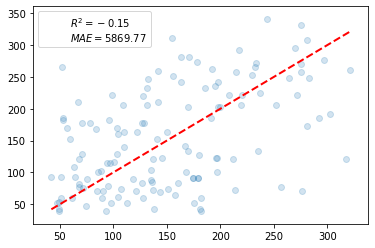

In [8]:
extra = plt.Rectangle((0, 0), 0, 0, fc="w", fill=False,
                          edgecolor='none', linewidth=0)
scores = (r'$R^2={:.2f}$' + '\n' + r'$MAE={:.2f}$').format(r2_score(y_test, y_pred_rt),
                mean_squared_error(y_test,y_pred_rt))
plt.legend([extra], [scores], loc='upper left')
plt.plot([y_test.min(), y_test.max()],
        [y_test.min(), y_test.max()],
        '--r', linewidth=2)
plt.scatter(y_test, y_pred_rt, alpha=0.2)

# Train random forest

In [9]:
rf = RandomForestRegressor(n_estimators=200, oob_score=True,random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=True,
                      random_state=0, verbose=0, warm_start=False)

# Make prediction with random forest

In [10]:
y_pred_rf = rf.predict(X_test)

# Evaluate the random forest model

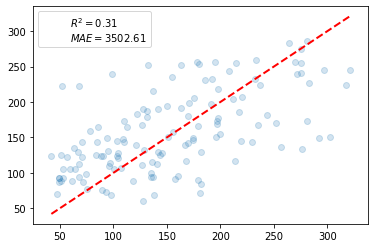

In [11]:
extra = plt.Rectangle((0, 0), 0, 0, fc="w", fill=False,
                          edgecolor='none', linewidth=0)
scores = (r'$R^2={:.2f}$' + '\n' + r'$MAE={:.2f}$').format(r2_score(y_test, y_pred_rf),
                mean_squared_error(y_test,y_pred_rf))
plt.legend([extra], [scores], loc='upper left')
plt.plot([y_test.min(), y_test.max()],
        [y_test.min(), y_test.max()],
        '--r', linewidth=2)
plt.scatter(y_test, y_pred_rf, alpha=0.2)

# Extract feature importance

Text(0.5, 1.0, 'Feature Importance (MDI)')

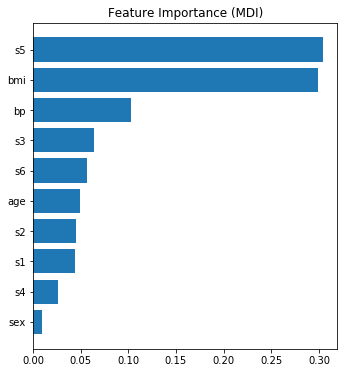

In [13]:
feature_importance = rf.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(diabetes.feature_names)[sorted_idx])
plt.title('Feature Importance (MDI)')